In [263]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [264]:
# Import
df = pd.read_csv("2016.12.16.csv")
pd.set_option('display.max_rows', df.shape[0]+1)

In [265]:
# Stats
starting_budget = 1000
total_profit_abs = round(df.ProfitLoss.sum(),2)
total_profit_proc = round(100*total_profit_abs/starting_budget,2)

In [269]:
# Functions

def add_bet_risk_and_profit_colummns_to_df(df):
    
    # risk
    df['BetRisk'] = df.Odds * df.Stake - df.Stake
    back_bets_indeces = df[df.BidType == "Back"].index.tolist()
    for back_bet_index in back_bets_indeces:
        df.set_value(back_bet_index, 'BetRisk', df.Stake[back_bet_index])
        
    # profit
    df['BetProfit'] = df.Odds * df.Stake - df.Stake
    lay_bets_indeces = df[df.BidType == "Lay"].index.tolist()
    for lay_bet_index in lay_bets_indeces:
        df.set_value(lay_bet_index, 'BetProfit', df.Stake[lay_bet_index])
    return df

def get_outliers(df, column):
    outliers = []
    summary = df.describe().round(2)
    q1 = summary[column]['25%']
    q2 = summary[column]['50%']
    q3 = summary[column]['75%']
    return list(df[column][df[column] > q2 + 1.5*(q3-q1)])

def show_comparision_two_features(df, first, second, first_legend, second_legend, title):   
    # bet's potential losses and profits
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,5))

    # distribution of bet's potential losses and profits
    sns.distplot(df[first], bins = 100, kde = True, hist = False, color = 'b', 
                 ax = ax1, label = '')
    sns.distplot(df[second], bins = 100, kde = True, hist = False, color = 'g', 
                 ax = ax1, label = '')

    # boxplot for bet's potential loss and profit
    bidtype_betrisk_betprofit = df.ix[:, [first, second]]
    sns.boxplot(data = bidtype_betrisk_betprofit, showfliers = False, ax = ax2)

    # stripplot for bet's potential loss and profit outliers
    outliers = {second: get_outliers(df, second),
               first: get_outliers(df, first)}

    sp = pd.DataFrame.from_dict(outliers, orient = 'index').T
    sp = sp[[first, second]]
    sns.stripplot(data=sp, ax = ax3)

    # legend and axes labels
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Density')
    ax1.legend([first_legend, second_legend], fontsize = 12)
    ax1.set_xlim([0, max([summary.ix['max', first], summary.ix['max', second]])])
    ax1.set_title('Distribution', fontsize = 14)
    ax2.set_ylabel('Value')
    ax2.set_title('Boxplot', fontsize = 14)
    ax3.set_ylabel('Value')
    ax3.set_title('Outliers', fontsize = 14)

    fig.suptitle(title, fontsize = 20).set_position([0.5, 1.05]);
    
def show_markets(df):
    # unique markets
    markets = []
    for market in df.Market:
        markets.append(market.split('/')[-1])
    list_of_markets = list(set(markets))

    #count markets
    market_freq = {}
    for market in list_of_markets:
        market_freq[market] = markets.count(market)

    # figure params    
    fig = plt.figure(figsize = (12,5))  
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)

    # draw pie chart
    freq = market_freq.values()
    labels = market_freq.keys()
    explode = [0.2 for i in range(len(freq))]
    patches, texts, autotexts = ax1.pie(freq, startangle=30, explode = explode, 
                                  autopct = '%.1f%%', pctdistance = 1.2)
    for autotext in autotexts:
        autotext.set_fontsize(12)
    ax1.axis('equal')
    ax2.legend(patches, labels, loc = 3, fontsize = 14)
    ax2.axis('off')
    plt.show()

In [270]:
# Dataset 
df = add_bet_risk_and_profit_colummns_to_df(df).round(2)
summary = df.describe().round(2)
summary

,Odds,Stake,ProfitLoss,BetRisk,BetProfit
count,303.00,303.00,303.00,303.00,303.00
mean,4.55,8.65,0.87,8.03,11.57
std,10.36,9.10,10.38,10.87,11.40
min,1.01,0.04,-49.54,0.01,0.04
25%,1.46,3.00,-3.70,2.00,5.00
50%,1.96,6.00,-1.00,4.05,8.94
75%,3.40,10.00,6.08,10.00,13.24
max,100.00,65.42,50.00,90.00,72.66


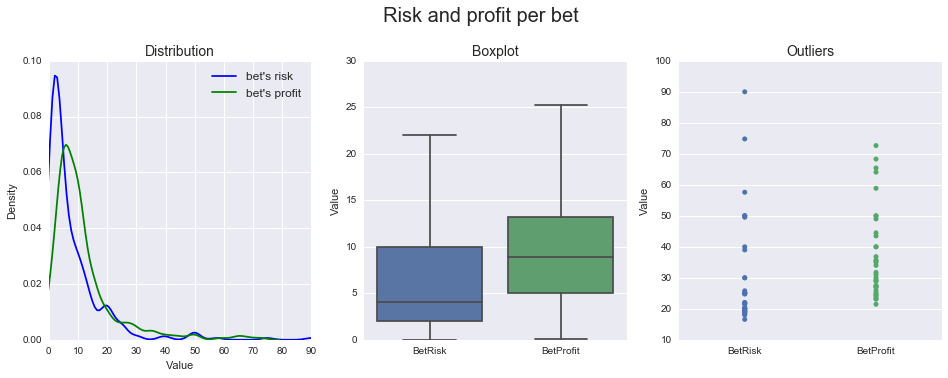

In [260]:
show_comparision_two_features(df, 'BetRisk', 'BetProfit', 'bet\'s risk', 'bet\'s profit', 'Risk and profit per bet')

In [272]:
# draw the same plots for actual loss and profits

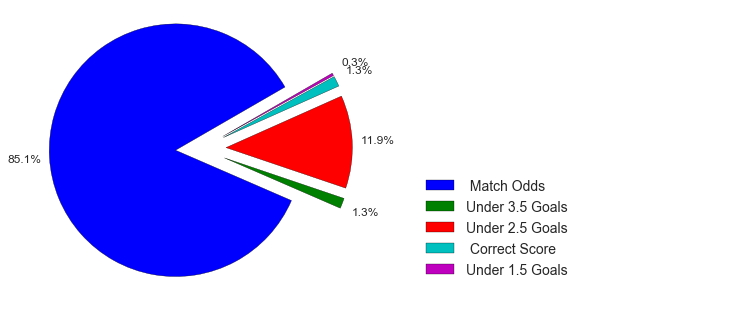

In [110]:
show_markets(df)

In [271]:
# Dataset
df

,Market,Selection,BidType,Odds,Stake,ProfitLoss,BetRisk,BetProfit
0,16 December / Hoffenheim v Dortmund / Match Odds,The Draw,Lay,1.33,3.00,-0.99,0.99,3.00
1,16 December / Alaves v Betis / Match Odds,Alaves,Lay,1.29,10.00,-2.90,2.90,10.00
2,16 December / Norwich v Huddersfield / Match ...,Huddersfield,Lay,1.53,2.00,-1.06,1.06,2.00
3,16 December / Hoffenheim v Dortmund / Match Odds,Hoffenheim,Back,2.60,2.00,-2.00,2.00,3.20
4,16 December / Angers v Nantes / Match Odds,Nantes,Lay,1.63,5.00,-3.15,3.15,5.00
5,16 December / Norwich v Huddersfield / Match ...,Huddersfield,Lay,1.78,5.00,-3.90,3.90,5.00
6,16 December / Hoffenheim v Dortmund / Match Odds,Hoffenheim,Back,1.45,8.12,-8.12,8.12,3.65
7,16 December / Hoffenheim v Dortmund / Match Odds,Hoffenheim,Lay,2.34,5.00,5.00,6.70,5.00
8,12 December / Roma v AC Milan / Match Odds,Roma,Lay,1.27,4.00,-1.08,1.08,4.00
9,12 December / Villarreal v Atletico Madrid / ...,Villarreal,Lay,1.28,4.00,-1.12,1.12,4.00
